In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.insert(0,'..')
import pickle

import visualize
import datasets
import ldle
# Uncomment to reload a library
from importlib import reload 
visualize = reload(visualize)
ldle = reload(ldle)
datasets = reload(datasets)

matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline
matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline


In [3]:
save_dir_root = '../data/ldle/face_data/'

In [4]:
X, labelsMat, ddX = datasets.Datasets().face_data(fpath='../data/face_data.mat')

X.shape =  (698, 4096)


# LDLE

In [5]:
ldle_obj = ldle.LDLE(X=X, eta_min=3, N=5, k=8, d=2, max_iter0=5,
                     tau=75, delta=0.9, to_tear=False,
                     vis = visualize.Visualize(save_dir_root),
                     vis_y_options = {'cmap0':'jet', # for the interior
                                      'cmap1':'jet', # for the tear
                                      'labels':labelsMat[:,1]})

A_k, Atilde_k: 0 points processed...
A_k, Atilde_k: 174 points processed...
A_k, Atilde_k: 348 points processed...
A_k, Atilde_k: 522 points processed...
A_k, Atilde_k: 696 points processed...
Atilde_k, Atilde_k: all points processed...

Constructing low distortion local views using LDLE...
local_param: 0 points processed...
local_param: 174 points processed...
local_param: 348 points processed...
local_param: 522 points processed...
local_param: 696 points processed...
local_param: all 698 points processed...
After iter 1, max distortion is 73.037417
After iter 2, max distortion is 50.026065
After iter 3, max distortion is 35.620040
After iter 4, max distortion is 35.620040
After iter 5, max distortion is 35.620040
After iter 6, max distortion is 35.620040
After iter 7, max distortion is 35.620040
After iter 8, max distortion is 35.620040
After iter 9, max distortion is 35.620040
After iter 10, max distortion is 35.620040
After iter 11, max distortion is 35.620040
Max local distortion

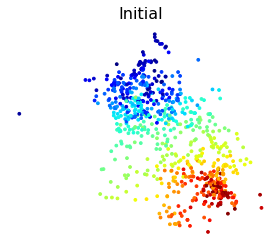

###############
Took 0.5 seconds to compute initial global embedding.
###############

Refining parameters and computing final global embedding...
Using GPA...
Iteration: 0
error: 0.03018149621528863


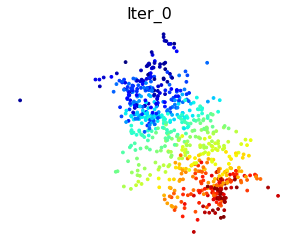

Iteration: 1
error: 0.029981174870829803
Iteration: 2
error: 0.0298757565704031
Iteration: 3
error: 0.029947262625020527
Iteration: 4
error: 0.030020966829013316


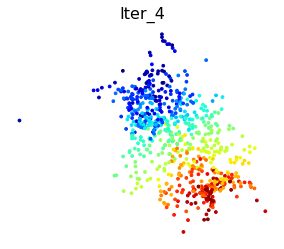

###############
Took 8.3 seconds to refine global embedding.
###############
###############
Took 8.8 seconds to perform step 3: compute global embedding.
###############


In [6]:
ldle_obj.fit()

# Optionally save for further visualizations using Visualization.ipynb

In [8]:
save_path = save_dir_root+'/ldle_obj.dat'
with open(save_path, "wb") as f:
    pickle.dump([X, labelsMat, ldle_obj], f)

# LTSA

In [9]:
from sklearn.manifold import LocallyLinearEmbedding
import visualize
vis = visualize.Visualize(save_dir_root)

In [10]:
ltsa_obj = LocallyLinearEmbedding(method='ltsa', n_neighbors=25, n_components=2, n_jobs=-1, random_state=42)

In [11]:
y_ltsa = ltsa_obj.fit_transform(X)

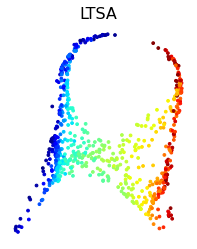

In [21]:
vis.global_embedding(y_ltsa, labelsMat[:,1], 'jet', title='LTSA')

# UMAP

In [13]:
from umap import UMAP
import visualize
vis = visualize.Visualize(save_dir_root)

In [33]:
umap_obj = UMAP(n_neighbors=100, n_components=2,
                random_state=42, n_epochs=500, metric='euclidean')

In [34]:
y_umap = umap_obj.fit_transform(X)

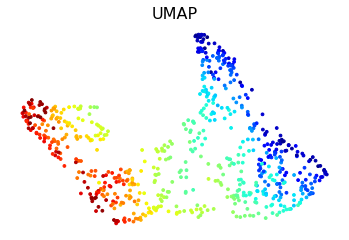

In [35]:
vis.global_embedding(y_umap, labelsMat[:,1], 'jet', title='UMAP')

# t-SNE

In [17]:
from sklearn.manifold import TSNE
import visualize
vis = visualize.Visualize(save_dir_root)

In [27]:
tsne_obj = TSNE(perplexity=60, early_exaggeration=4, n_components=2,
                metric='euclidean', random_state=42, n_iter=1000,
                n_jobs=-1, init='random')

In [28]:
y_tsne = tsne_obj.fit_transform(X)

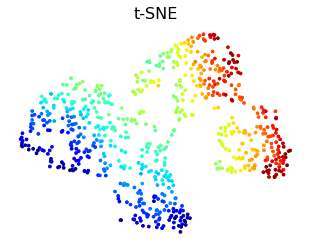

In [29]:
vis.global_embedding(y_tsne, labelsMat[:,1], 'jet', title='t-SNE')